In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette("rainbow_r")
import matplotlib.style
plt.style.use('seaborn')
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

In [129]:
df = pd.read_excel('NBFC Loan Transaction Data.xlsx')
df.head().T

,0,1,2,3,4
AGREEMENTID,11220001,11220002,11220006,11220008,11220010
AUTHORIZATIONDATE,2010-08-29 00:00:00,2010-09-15 00:00:00,2010-11-02 00:00:00,2010-10-06 00:00:00,2010-10-26 00:00:00
BALANCE_EXCESS,0,0,0,0,0
BALANCE_TENURE,0,99,231,0,215
CITY,MUMBAI,MUMBAI,MUMBAI,THANE,MUMBAI
COMPLETED_TENURE,45,38,81,91,89
CURRENT_INTEREST_RATE,13.4219,13.7341,15.6069,11.237,14.9826
CURRENT_INTEREST_RATE_MAX,13.7341,13.7341,16.2312,13.7341,15.6069
CURRENT_INTEREST_RATE_MIN,13.4219,13.7341,15.6069,11.237,14.9826
CURRENT_INTEREST_RATE_CHANGES,1,0,2,4,2


In [130]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 20012 
The number of columns (variables) is 53


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [132]:
df.duplicated().sum()

0

In [133]:
df.drop('AGREEMENTID', axis = 1, inplace = True)
df.drop('CUSTOMERID', axis = 1, inplace = True)
df.drop('SCHEMEID', axis = 1, inplace = True)
df.drop('NPA_IN_LAST_MONTH', axis = 1, inplace = True)
df.drop('NPA_IN_CURRENT_MONTH', axis = 1, inplace = True)
df.drop('MOB', axis = 1, inplace = True)

In [134]:
df.isnull().sum()

AUTHORIZATIONDATE                        0
BALANCE_EXCESS                           0
BALANCE_TENURE                           0
CITY                                     0
COMPLETED_TENURE                         0
CURRENT_INTEREST_RATE                    0
CURRENT_INTEREST_RATE_MAX                0
CURRENT_INTEREST_RATE_MIN                0
CURRENT_INTEREST_RATE_CHANGES            0
CURRENT_TENOR                            0
DIFF_AUTH_INT_DATE                       0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN       0
DIFF_EMI_AMOUNT_MAX_MIN                 89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE      0
DIFF_ORIGINAL_CURRENT_TENOR              0
DPD                                      0
DUEDAY                                   0
EMI_AMOUNT                               0
EMI_DUEAMT                               0
EMI_OS_AMOUNT                            0
EMI_RECEIVED_AMT                         0
EXCESS_ADJUSTED_AMT                      0
EXCESS_AVAILABLE                         0
FOIR       

In [135]:
df.dropna(inplace=True)

In [136]:
df.shape

(19765, 47)

In [137]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
BALANCE_EXCESS,19765.0,78401.55,1349202.94,0.00,0.00,0.00,64.05,7.555600e+07
BALANCE_TENURE,19765.0,173.29,63.70,0.00,136.00,174.00,216.00,6.740000e+02
COMPLETED_TENURE,19765.0,17.31,16.45,0.00,6.00,12.00,25.00,9.800000e+01
CURRENT_INTEREST_RATE,19765.0,14.79,2.48,10.43,12.80,14.55,16.23,2.510000e+01
CURRENT_INTEREST_RATE_MAX,19765.0,14.90,2.48,10.43,13.11,14.67,16.54,3.746000e+01
CURRENT_INTEREST_RATE_MIN,19765.0,14.30,2.67,-5.06,12.42,13.73,16.17,2.403000e+01
CURRENT_INTEREST_RATE_CHANGES,19765.0,0.76,1.14,0.00,0.00,0.00,2.00,9.000000e+00
CURRENT_TENOR,19765.0,190.60,58.25,6.00,167.00,180.00,228.00,7.130000e+02
DIFF_AUTH_INT_DATE,19765.0,0.01,0.57,-17.00,0.00,0.00,0.00,7.000000e+01
DIFF_CURRENT_INTEREST_RATE_MAX_MIN,19765.0,0.60,0.97,0.00,0.00,0.00,1.19,2.435000e+01


In [138]:
df.FORECLOSURE.value_counts()

0    18024
1     1741
Name: FORECLOSURE, dtype: int64

Text(0.5, 1.0, 'Proportion of Foreclosed Loans')

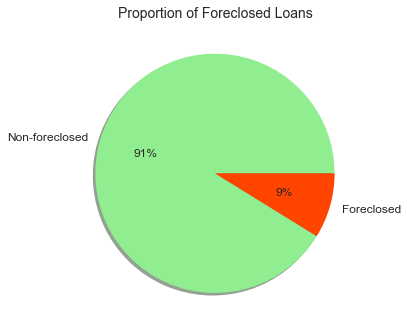

In [139]:
colors = ['cyan','red','yellow','green','orange','blue']
#plt.figure(figsize=(5,5))
df.FORECLOSURE.value_counts(normalize=True).plot(kind='pie', 
                                                 autopct='%1.0f%%', 
                                                 colors = ['lightgreen','orangered'],
                                                 shadow = True,
                                                 labels = ['Non-foreclosed','Foreclosed'],
                                                 fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Foreclosed Loans', fontsize=14)

In [140]:
df.PRODUCT.value_counts()

STHL     7208
LAP      6113
HL       3433
STLAP    3011
Name: PRODUCT, dtype: int64

Text(0.5, 1.0, 'Proportion of Product Types')

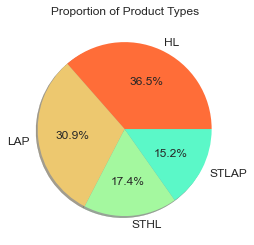

In [141]:
sizes = df['PRODUCT'].value_counts().sort_index() / df['PRODUCT'].value_counts().sum() * 100
plt.figure(figsize=(4,4))
df.PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types', fontsize = 12)

In [142]:
df[df.FORECLOSURE == 1].PRODUCT.value_counts()

HL      971
STHL    768
LAP       2
Name: PRODUCT, dtype: int64

Text(0.5, 1.0, 'Proportion of Product Types - Foreclosed')

<Figure size 576x396 with 0 Axes>

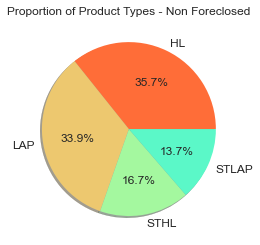

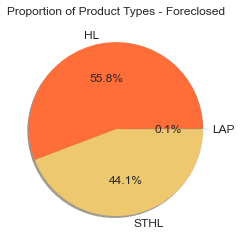

In [143]:
#sizes = df['PRODUCT'].value_counts().sort_index() / df['PRODUCT'].value_counts().sum() * 100

plt.figure(0)
plt.figure(figsize=(4,4))
df[df.FORECLOSURE == 0].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - Non Foreclosed', fontsize = 12)

plt.figure(1)
plt.figure(figsize=(4,4))
#df[df.FORECLOSURE == 1].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
df[df.FORECLOSURE == 1].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - Foreclosed', fontsize = 12)

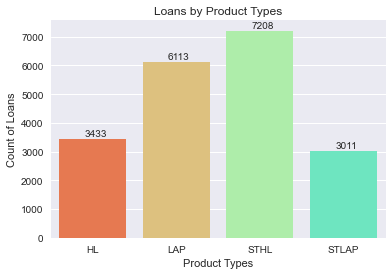

In [144]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df.PRODUCT,palette = color)
plt.title('Loans by Product Types')
plt.xlabel('Product Types')
plt.ylabel('Count of Loans')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+100))

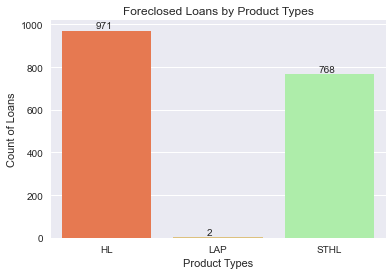

In [145]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df[df.FORECLOSURE == 1].PRODUCT,palette = color)
plt.title('Foreclosed Loans by Product Types')
plt.xlabel('Product Types')
plt.ylabel('Count of Loans')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+10))

<Figure size 432x288 with 0 Axes>

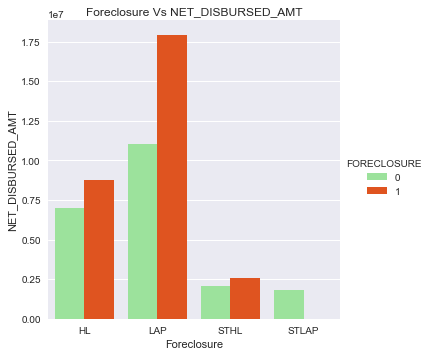

In [146]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="NET_DISBURSED_AMT", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
plt.title('Foreclosure Vs NET_DISBURSED_AMT')
plt.xlabel('Foreclosure')
plt.ylabel('NET_DISBURSED_AMT')
plt.show()

Text(36.003958333333344, 0.5, 'BALANCE_EXCESS')

<Figure size 432x288 with 0 Axes>

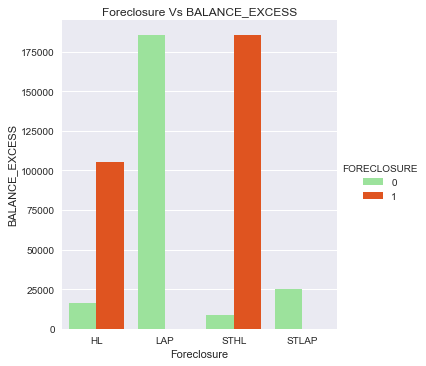

In [147]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="BALANCE_EXCESS", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
#ax = sns.catplot(x="FORECLOSURE", y="BALANCE_EXCESS", hue = 'PRODUCT', kind="bar", data=df, palette = colors, ci=None)
plt.title('Foreclosure Vs BALANCE_EXCESS')
plt.xlabel('Foreclosure')
plt.ylabel('BALANCE_EXCESS')

Text(36.003958333333344, 0.5, 'EXCESS_AVAILABLE')

<Figure size 432x288 with 0 Axes>

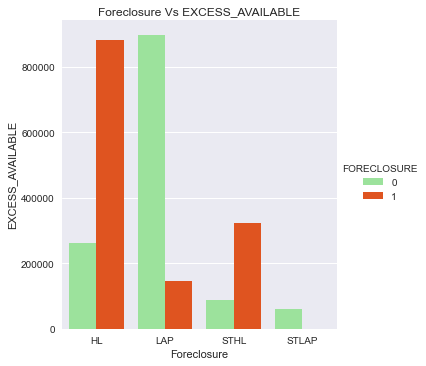

In [148]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="EXCESS_AVAILABLE", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
#ax = sns.catplot(x="FORECLOSURE", y="BALANCE_EXCESS", hue = 'PRODUCT', kind="bar", data=df, palette = colors, ci=None)
plt.title('Foreclosure Vs EXCESS_AVAILABLE')
plt.xlabel('Foreclosure')
plt.ylabel('EXCESS_AVAILABLE')

In [149]:
df.CITY.value_counts()

MUMBAI           1995
HYDERABAD        1556
SURAT            1386
AHMEDABAD        1385
PUNE             1179
                 ... 
LUCKNOW             1
PALWAL              1
DENKANIKOTTAI       1
MANCHERIAL          1
BHIWANDI            1
Name: CITY, Length: 271, dtype: int64

(42.5, -0.5)

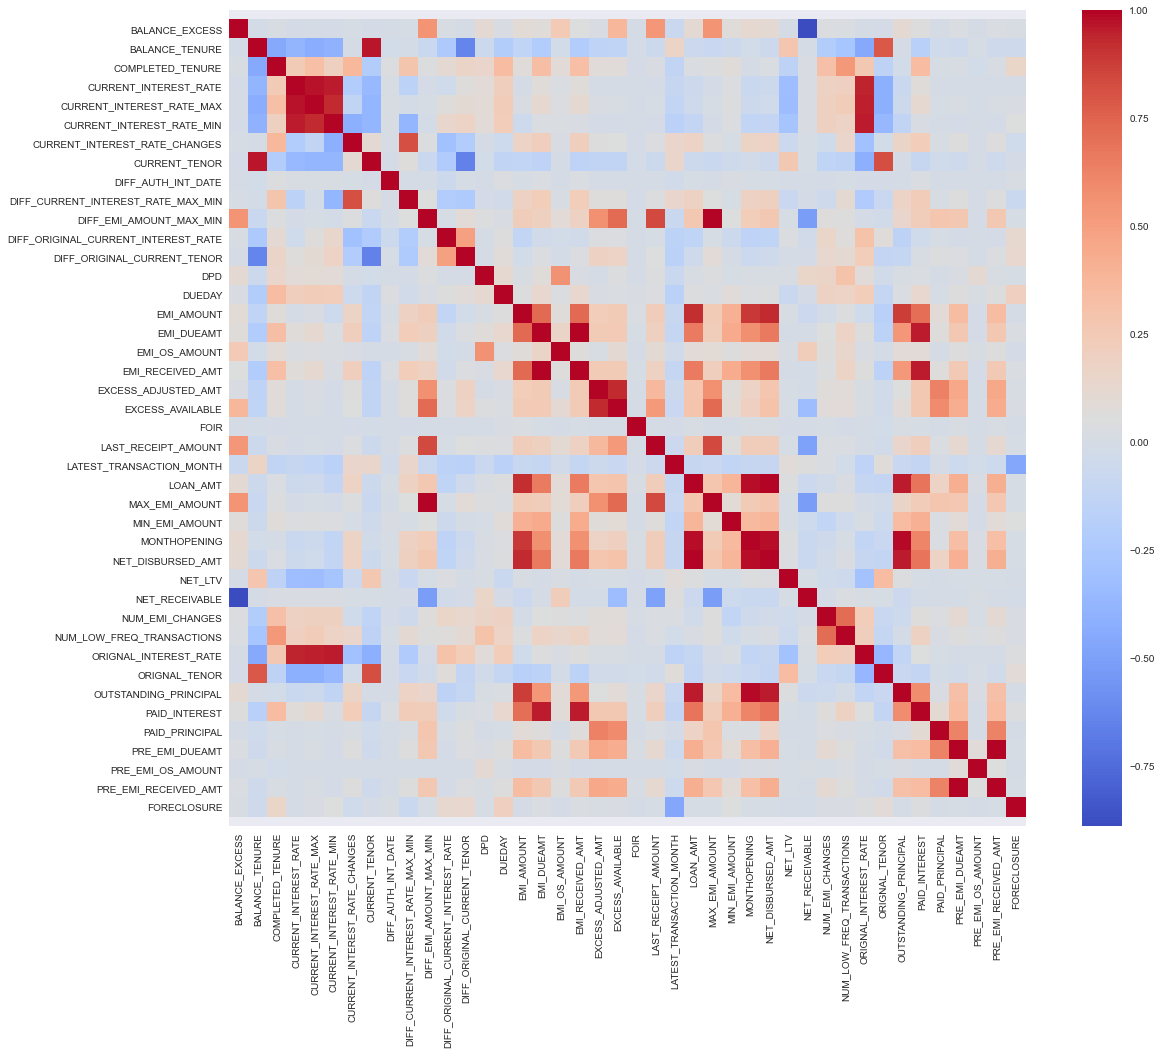

In [150]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df.corr(),cmap='coolwarm',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

### 1. LOAN AMOUNT

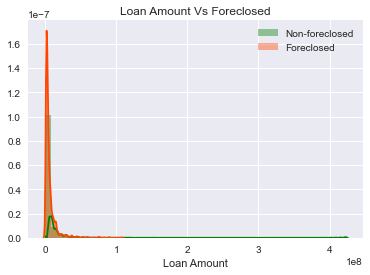

In [151]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].LOAN_AMT, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].LOAN_AMT, label = 'Foreclosed', color = 'orangered')
ax.set_title('Loan Amount Vs Foreclosed',fontsize=12)
ax.set_xlabel('Loan Amount')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'Loan Amount to Foreclosure')

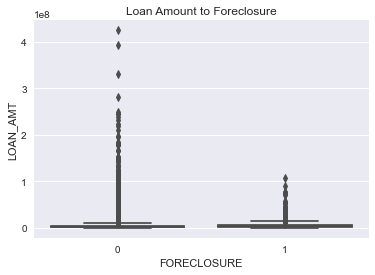

In [152]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['LOAN_AMT'], palette = ['lightgreen','orangered'] )
plt.title('Loan Amount to Foreclosure')

### ORIGINAL TENURE

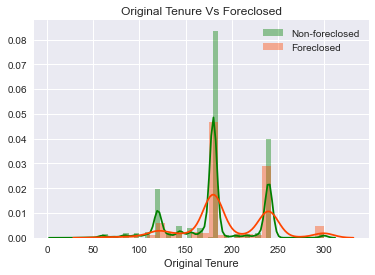

In [153]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].ORIGNAL_TENOR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].ORIGNAL_TENOR, label = 'Foreclosed', color = 'orangered')
ax.set_title('Original Tenure Vs Foreclosed',fontsize=12)
ax.set_xlabel('Original Tenure')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'ORIGINAL TENURE to Foreclosure')

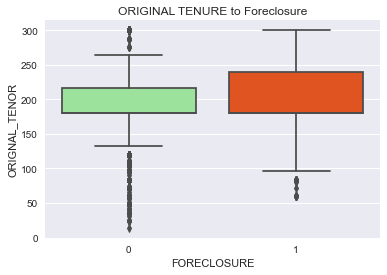

In [154]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['ORIGNAL_TENOR'], palette = ['lightgreen','orangered'] )
plt.title('ORIGINAL TENURE to Foreclosure')

### CURRENT TENURE

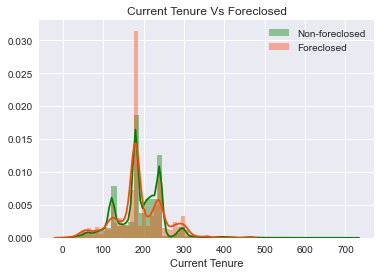

In [155]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].CURRENT_TENOR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].CURRENT_TENOR, label = 'Foreclosed', color = 'orangered')
ax.set_title('Current Tenure Vs Foreclosed',fontsize=12)
ax.set_xlabel('Current Tenure')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'CURRENT TENURE to Foreclosure')

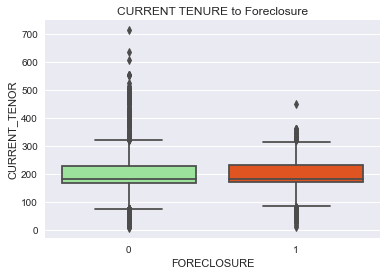

In [156]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['CURRENT_TENOR'], palette = ['lightgreen','orangered'] )
plt.title('CURRENT TENURE to Foreclosure')

### CURRENT INTEREST RATE

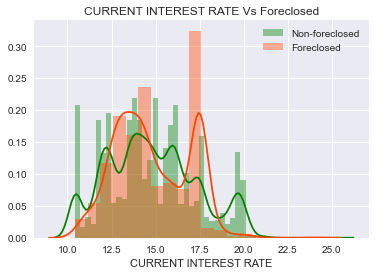

In [157]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].CURRENT_INTEREST_RATE, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].CURRENT_INTEREST_RATE, label = 'Foreclosed', color = 'orangered')
ax.set_title('CURRENT INTEREST RATE Vs Foreclosed',fontsize=12)
ax.set_xlabel('CURRENT INTEREST RATE')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'CURRENT INTEREST RATE to Foreclosure')

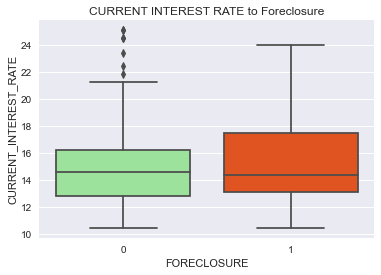

In [158]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['CURRENT_INTEREST_RATE'], palette = ['lightgreen','orangered'] )
plt.title('CURRENT INTEREST RATE to Foreclosure')

###  EMI Amount 

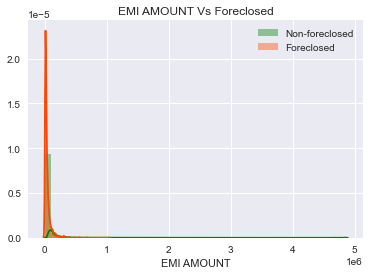

In [159]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].EMI_AMOUNT, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].EMI_AMOUNT, label = 'Foreclosed', color = 'orangered')
ax.set_title('EMI AMOUNT Vs Foreclosed',fontsize=12)
ax.set_xlabel('EMI AMOUNT')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'EMI_AMOUNT to Foreclosure')

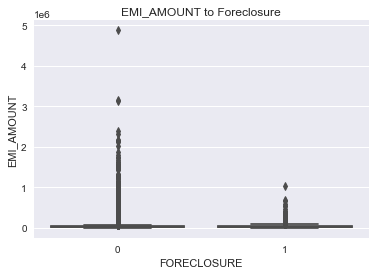

In [160]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['EMI_AMOUNT'] , palette = ['lightgreen','orangered'])
plt.title('EMI_AMOUNT to Foreclosure')

Text(0.5, 1.0, 'Proportion of Product Types - EMI Above Rs 50000')

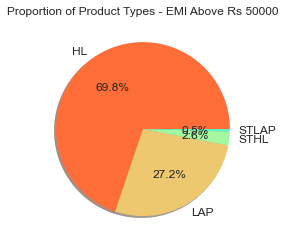

In [161]:
plt.figure(figsize=(4,4))
df[df.EMI_AMOUNT >= 50000].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - EMI Above Rs 50000', fontsize = 12)

Text(0.5, 1.0, 'Proportion of Product Types - EMI below Rs 50000')

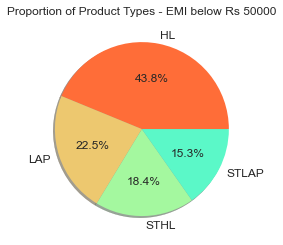

In [162]:
plt.figure(figsize=(4,4))
df[df.EMI_AMOUNT < 50000].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - EMI below Rs 50000', fontsize = 12)

### NUM EMI CHANGES

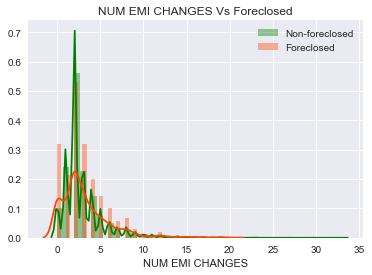

In [163]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NUM_EMI_CHANGES, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NUM_EMI_CHANGES, label = 'Foreclosed', color = 'orangered')
ax.set_title('NUM EMI CHANGES Vs Foreclosed',fontsize=12)
ax.set_xlabel('NUM EMI CHANGES')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NUM_EMI_CHANGES to Foreclosure')

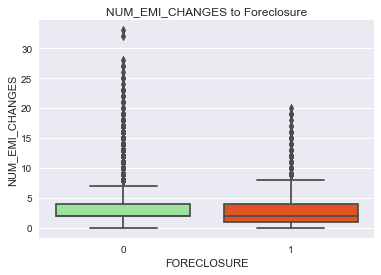

In [164]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NUM_EMI_CHANGES'] , palette = ['lightgreen','orangered'])
plt.title('NUM_EMI_CHANGES to Foreclosure')

### FOIR

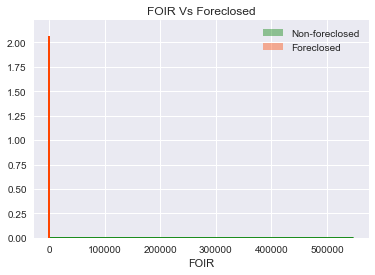

In [165]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].FOIR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].FOIR, label = 'Foreclosed', color = 'orangered')
ax.set_title('FOIR Vs Foreclosed',fontsize=12)
ax.set_xlabel('FOIR')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'FOIR to Foreclosure')

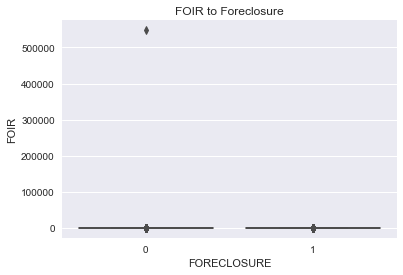

In [166]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['FOIR'] , palette = ['lightgreen','orangered'])
plt.title('FOIR to Foreclosure')

In [167]:
# Fixed obligation to income ratio values must be between 0 and 1. So values above 1 can be imputed to 1
df['FOIR'] = np.where(df['FOIR'] > 1, 1, df['FOIR'])
df['FOIR'] = np.where(df['FOIR'] < 0, 0, df['FOIR'])

Text(0.5, 1.0, 'FOIR to Foreclosure')

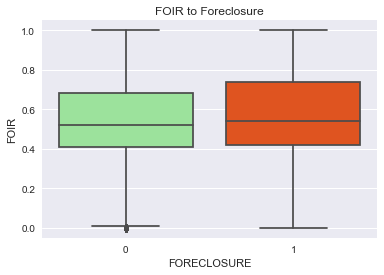

In [168]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['FOIR'] , palette = ['lightgreen','orangered'])
plt.title('FOIR to Foreclosure')

### No of low freq transactions

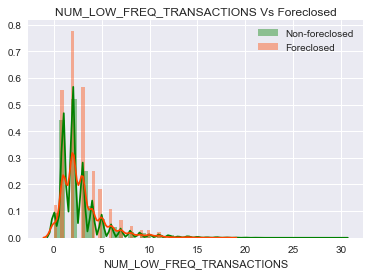

In [169]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NUM_LOW_FREQ_TRANSACTIONS, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NUM_LOW_FREQ_TRANSACTIONS, label = 'Foreclosed', color = 'orangered')
ax.set_title('NUM_LOW_FREQ_TRANSACTIONS Vs Foreclosed',fontsize=12)
ax.set_xlabel('NUM_LOW_FREQ_TRANSACTIONS')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NUM_LOW_FREQ_TRANSACTIONS to Foreclosure')

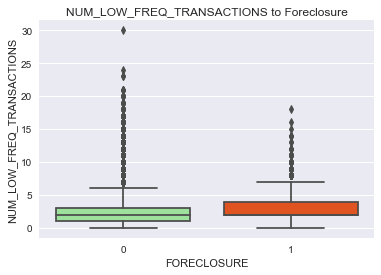

In [170]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NUM_LOW_FREQ_TRANSACTIONS'] , palette = ['lightgreen','orangered'])
plt.title('NUM_LOW_FREQ_TRANSACTIONS to Foreclosure')

### OUTSTANDING_PRINCIPAL

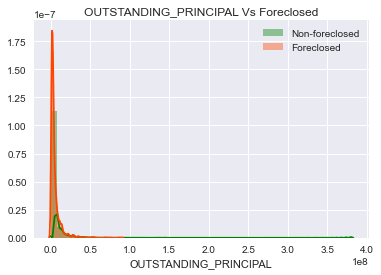

In [171]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].OUTSTANDING_PRINCIPAL, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].OUTSTANDING_PRINCIPAL, label = 'Foreclosed', color = 'orangered')
ax.set_title('OUTSTANDING_PRINCIPAL Vs Foreclosed',fontsize=12)
ax.set_xlabel('OUTSTANDING_PRINCIPAL')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'OUTSTANDING_PRINCIPAL to Foreclosure')

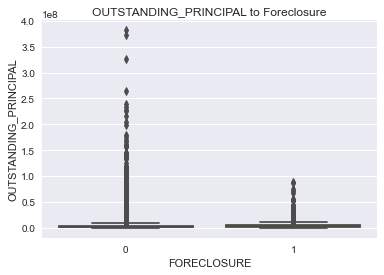

In [172]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['OUTSTANDING_PRINCIPAL'] , palette = ['lightgreen','orangered'])
plt.title('OUTSTANDING_PRINCIPAL to Foreclosure')

### Net Loan to Value

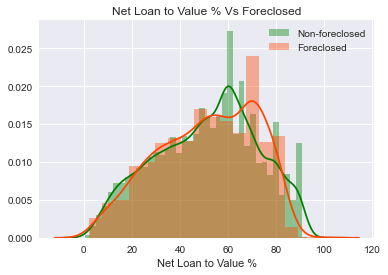

In [173]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NET_LTV, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NET_LTV, label = 'Foreclosed', color = 'orangered')
ax.set_title('Net Loan to Value % Vs Foreclosed',fontsize=12)
ax.set_xlabel('Net Loan to Value %')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NET_LTV to Foreclosure')

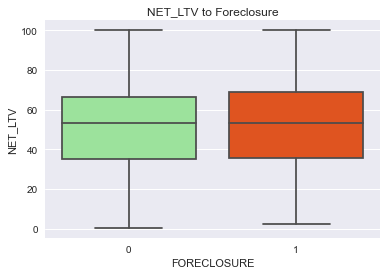

In [174]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NET_LTV'] , palette = ['lightgreen','orangered'])
plt.title('NET_LTV to Foreclosure')

### DPD

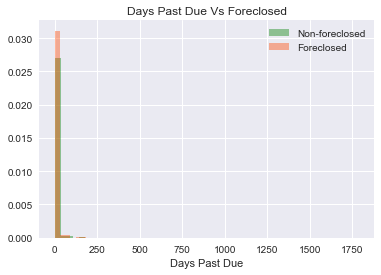

In [175]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].DPD, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].DPD, label = 'Foreclosed', color = 'orangered')
ax.set_title('Days Past Due Vs Foreclosed',fontsize=12)
ax.set_xlabel('Days Past Due')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'DPD to Foreclosure')

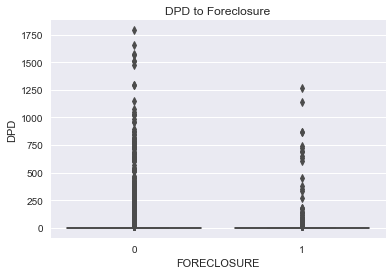

In [176]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['DPD'] , palette = ['lightgreen','orangered'])
plt.title('DPD to Foreclosure')

In [177]:
count = 0
for i in df.DPD : 
    if i > 0 : 
        count = count + 1

In [178]:
print ("Number of observations with DPD above ZERO : " + str(count))

Number of observations with DPD above ZERO : 1195


In [179]:
#939/15705

In [180]:
#df.drop('DPD', axis = 1, inplace = True)

### EXCESS AVAILABLE

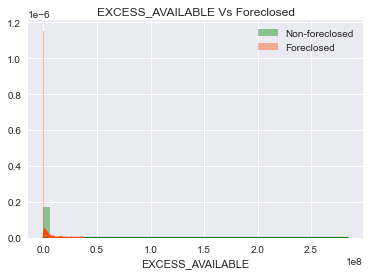

In [181]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].EXCESS_AVAILABLE, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].EXCESS_AVAILABLE, label = 'Foreclosed', color = 'orangered')
ax.set_title('EXCESS_AVAILABLE Vs Foreclosed',fontsize=12)
ax.set_xlabel('EXCESS_AVAILABLE')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'EXCESS_AVAILABLE to Foreclosure')

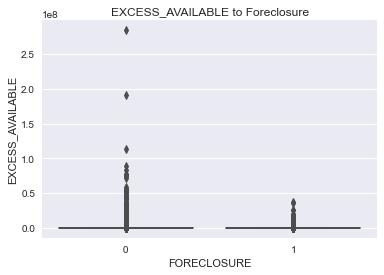

In [182]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['EXCESS_AVAILABLE'] , palette = ['lightgreen','orangered'])
plt.title('EXCESS_AVAILABLE to Foreclosure')

### MONTH OPENING

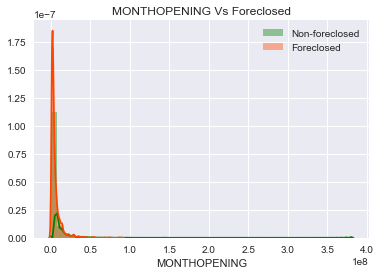

In [183]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].MONTHOPENING, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].MONTHOPENING, label = 'Foreclosed', color = 'orangered')
ax.set_title('MONTHOPENING Vs Foreclosed',fontsize=12)
ax.set_xlabel('MONTHOPENING')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'MONTHOPENING to Foreclosure')

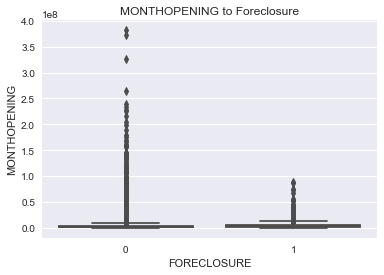

In [184]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['MONTHOPENING'] , palette = ['lightgreen','orangered'])
plt.title('MONTHOPENING to Foreclosure')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765 entries, 0 to 20011
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AUTHORIZATIONDATE                    19765 non-null  datetime64[ns]
 1   BALANCE_EXCESS                       19765 non-null  float64       
 2   BALANCE_TENURE                       19765 non-null  int64         
 3   CITY                                 19765 non-null  object        
 4   COMPLETED_TENURE                     19765 non-null  int64         
 5   CURRENT_INTEREST_RATE                19765 non-null  float64       
 6   CURRENT_INTEREST_RATE_MAX            19765 non-null  float64       
 7   CURRENT_INTEREST_RATE_MIN            19765 non-null  float64       
 8   CURRENT_INTEREST_RATE_CHANGES        19765 non-null  int64         
 9   CURRENT_TENOR                        19765 non-null  int64         
 10  DIFF_AUTH_

In [186]:
df_final = df[['NET_DISBURSED_AMT',
               'ORIGNAL_TENOR',
               'CURRENT_TENOR', 
               'COMPLETED_TENURE',
               'ORIGNAL_INTEREST_RATE',
               'CURRENT_INTEREST_RATE',
               'CURRENT_INTEREST_RATE_MAX',
               'CURRENT_INTEREST_RATE_CHANGES',
               'DPD',
               'DUEDAY',
               'EMI_AMOUNT',
               'EMI_OS_AMOUNT', 
               'MAX_EMI_AMOUNT',
               'LAST_RECEIPT_AMOUNT',
               'EXCESS_ADJUSTED_AMT',
               'EXCESS_AVAILABLE',
               'FOIR',
               'NET_LTV',
               'NUM_EMI_CHANGES',
               'NUM_LOW_FREQ_TRANSACTIONS',
               'OUTSTANDING_PRINCIPAL',
               'PAID_INTEREST',
               'PAID_PRINCIPAL',
               'PRODUCT']]

In [187]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765 entries, 0 to 20011
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NET_DISBURSED_AMT              19765 non-null  float64
 1   ORIGNAL_TENOR                  19765 non-null  int64  
 2   CURRENT_TENOR                  19765 non-null  int64  
 3   COMPLETED_TENURE               19765 non-null  int64  
 4   ORIGNAL_INTEREST_RATE          19765 non-null  float64
 5   CURRENT_INTEREST_RATE          19765 non-null  float64
 6   CURRENT_INTEREST_RATE_MAX      19765 non-null  float64
 7   CURRENT_INTEREST_RATE_CHANGES  19765 non-null  int64  
 8   DPD                            19765 non-null  int64  
 9   DUEDAY                         19765 non-null  int64  
 10  EMI_AMOUNT                     19765 non-null  float64
 11  EMI_OS_AMOUNT                  19765 non-null  float64
 12  MAX_EMI_AMOUNT                 19765 non-null 

In [188]:
options = ['HL', 'STHL'] 
df_final = df_final[df_final['PRODUCT'].isin(options)] 

In [189]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10641 entries, 0 to 20008
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NET_DISBURSED_AMT              10641 non-null  float64
 1   ORIGNAL_TENOR                  10641 non-null  int64  
 2   CURRENT_TENOR                  10641 non-null  int64  
 3   COMPLETED_TENURE               10641 non-null  int64  
 4   ORIGNAL_INTEREST_RATE          10641 non-null  float64
 5   CURRENT_INTEREST_RATE          10641 non-null  float64
 6   CURRENT_INTEREST_RATE_MAX      10641 non-null  float64
 7   CURRENT_INTEREST_RATE_CHANGES  10641 non-null  int64  
 8   DPD                            10641 non-null  int64  
 9   DUEDAY                         10641 non-null  int64  
 10  EMI_AMOUNT                     10641 non-null  float64
 11  EMI_OS_AMOUNT                  10641 non-null  float64
 12  MAX_EMI_AMOUNT                 10641 non-null 

In [190]:
df_final['DUEDAY'] = df_final['DUEDAY'].astype('object')

(22.5, -0.5)

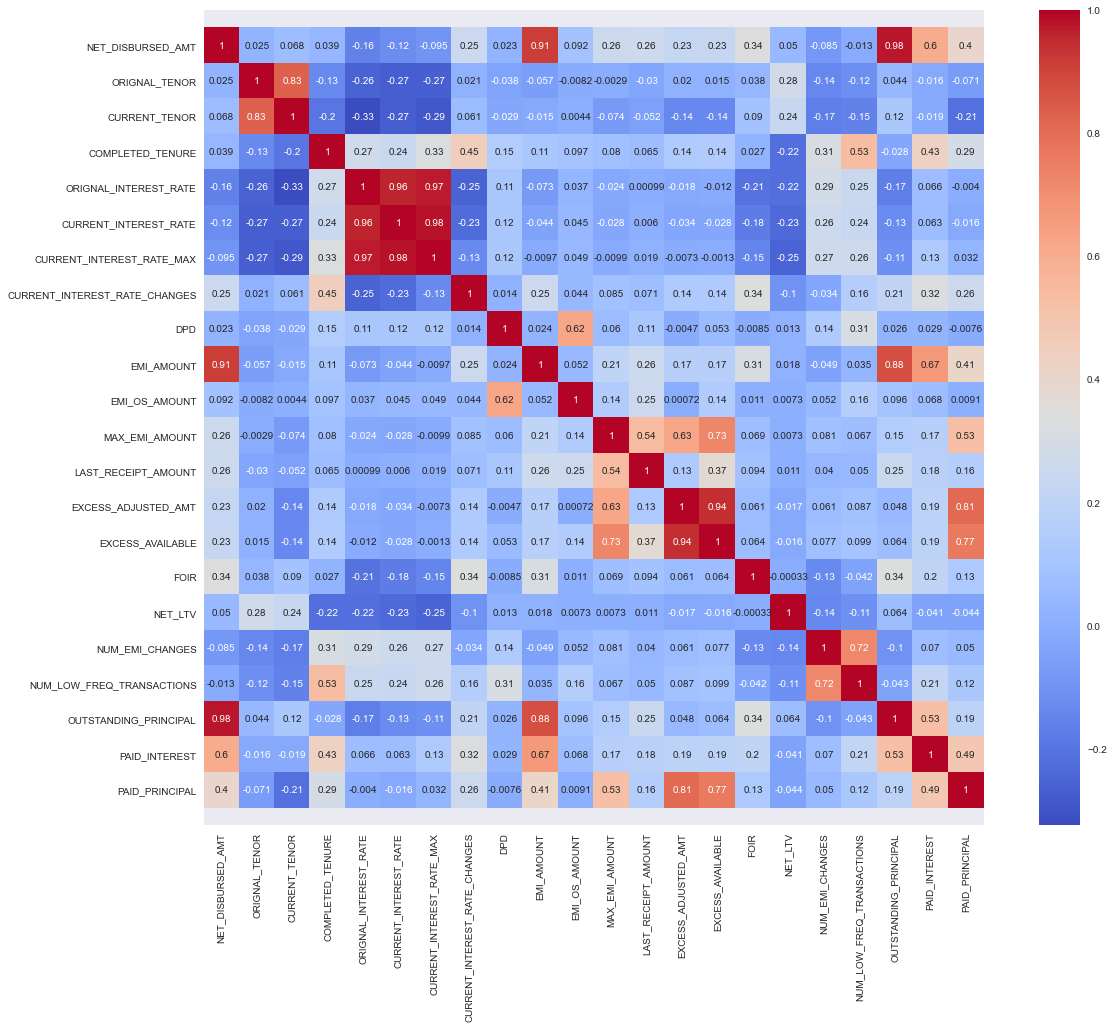

In [191]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df_final.corr(),cmap='coolwarm',square=True, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

In [192]:
df_final = pd.get_dummies(df_final, columns=['PRODUCT','DUEDAY'],drop_first=True)

In [193]:
df_final .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10641 entries, 0 to 20008
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NET_DISBURSED_AMT              10641 non-null  float64
 1   ORIGNAL_TENOR                  10641 non-null  int64  
 2   CURRENT_TENOR                  10641 non-null  int64  
 3   COMPLETED_TENURE               10641 non-null  int64  
 4   ORIGNAL_INTEREST_RATE          10641 non-null  float64
 5   CURRENT_INTEREST_RATE          10641 non-null  float64
 6   CURRENT_INTEREST_RATE_MAX      10641 non-null  float64
 7   CURRENT_INTEREST_RATE_CHANGES  10641 non-null  int64  
 8   DPD                            10641 non-null  int64  
 9   EMI_AMOUNT                     10641 non-null  float64
 10  EMI_OS_AMOUNT                  10641 non-null  float64
 11  MAX_EMI_AMOUNT                 10641 non-null  float64
 12  LAST_RECEIPT_AMOUNT            10641 non-null 

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
X = StandardScaler()

In [196]:
scaled_df = X.fit_transform(df_final)

In [197]:
scaled_df

array([[ 1.37571871, -1.87222014, -2.83952802, ..., -1.44900701,
        -3.07287988, -0.31526248],
       [ 2.7060347 , -0.50095144, -1.20369889, ..., -1.44900701,
        -3.07287988, -0.31526248],
       [ 0.01090534, -0.50095144,  1.90793261, ..., -1.44900701,
         0.32542762, -0.31526248],
       ...,
       [ 0.15318318,  0.59606352,  0.41434949, ..., -1.44900701,
         0.32542762, -0.31526248],
       [ 0.94417105,  0.87031726,  0.62771851, ..., -1.44900701,
         0.32542762, -0.31526248],
       [-0.27576422,  0.87031726,  0.62771851, ..., -1.44900701,
         0.32542762, -0.31526248]])

In [198]:
scaled_df = pd.DataFrame(scaled_df, index=df_final.index, columns=df_final.columns)
scaled_df.head()

,NET_DISBURSED_AMT,ORIGNAL_TENOR,CURRENT_TENOR,COMPLETED_TENURE,ORIGNAL_INTEREST_RATE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_CHANGES,DPD,EMI_AMOUNT,...,FOIR,NET_LTV,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRODUCT_STHL,DUEDAY_5,DUEDAY_15
0,1.375719,-1.872220,-2.839528,1.708100,-1.234281,-0.128672,-0.036615,0.351632,-0.109648,1.436004,...,0.404166,-0.881039,-0.793325,-0.695223,-0.648773,1.330442,8.823663,-1.449007,-3.072880,-0.315262
1,2.706035,-0.500951,-1.203699,1.288531,-1.234281,0.010693,-0.036615,-0.512506,-0.109648,2.501226,...,0.404166,1.253136,-1.154193,-1.090450,1.651512,2.720188,5.188274,-1.449007,-3.072880,-0.315262
2,0.010905,-0.500951,1.907933,3.865880,-0.840716,0.846882,1.079108,1.215770,-0.109648,-0.068237,...,0.988279,-0.358709,-0.432458,0.095232,-0.107563,1.496003,0.495769,-1.449007,0.325428,-0.315262
3,1.079559,-0.500951,-2.021613,4.465264,-1.234281,-1.104226,-0.036615,2.944046,-0.109648,0.994308,...,0.404166,1.268569,-0.071590,2.071368,-0.662595,2.534742,7.562085,-1.449007,-3.072880,-0.315262
4,0.681762,-0.500951,1.765687,4.345387,-1.103093,0.568152,0.800177,1.215770,-0.109648,0.713990,...,1.523716,-1.320897,-1.154193,0.095232,0.683538,3.752511,0.195679,-1.449007,0.325428,-0.315262


In [209]:
df_final['FORECLOSURE']=df['FORECLOSURE']
scaled_df['FORECLOSURE']=df['FORECLOSURE']

In [210]:
# Copy all the predictor variables into X dataframe
X = scaled_df.drop('FORECLOSURE', axis=1)

# Copy target into the y dataframe.  
y = scaled_df['FORECLOSURE']

## Train Test Split

In [211]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=27)

# LogisticRegression

In [212]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
#logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',n_jobs=2)
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [213]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [214]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
1097,0.500762,0.499238
3144,0.998644,0.001356
758,0.950350,0.049650
2620,0.991481,0.008519
191,0.993837,0.006163
1167,0.990688,0.009312
2102,0.997723,0.002277
1518,0.965076,0.034924
765,0.989313,0.010687
1440,0.919837,0.080163


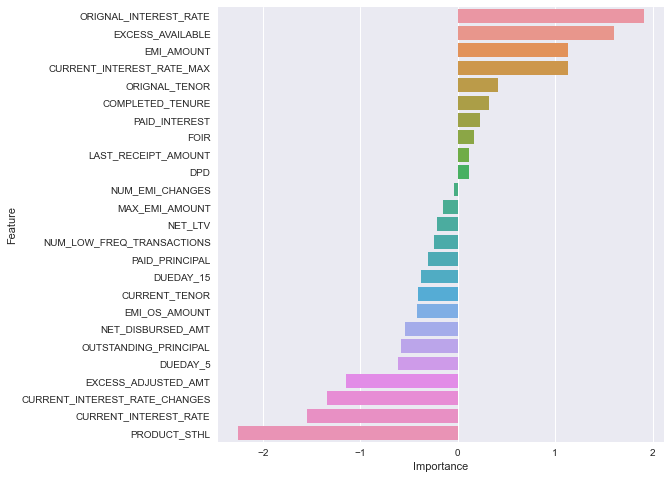

In [215]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [216]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [217]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class, conservative
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [218]:
logit_met,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.89
logit_train_precision  0.91
logit_train_recall  0.96
logit_train_f1  0.94


In [219]:
logit_met

,precision,recall,f1-score,support
0,0.912944,0.964836,0.938173,6228.000000
1,0.747113,0.530328,0.620326,1220.000000
accuracy,0.893663,0.893663,0.893663,0.893663
macro avg,0.830029,0.747582,0.779250,7448.000000
weighted avg,0.885781,0.893663,0.886109,7448.000000


In [220]:
def draw_cm(actual, predicted, title):
    cm = confusion_matrix(actual, predicted, [0,1])
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12},
              xticklabels = ["0", "1"],
              yticklabels = ["0", "1"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

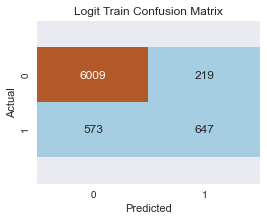

In [221]:
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

In [222]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

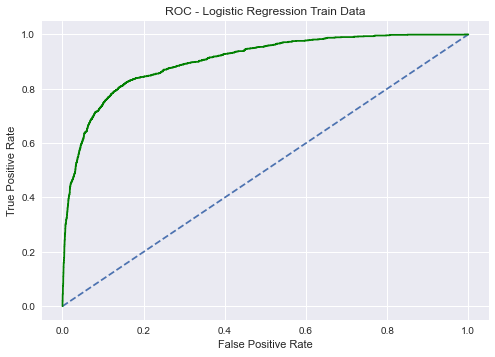

logit_train_auc 0.9035367773250366


In [223]:
logit_train_auc, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train, y_train, 'g', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc)

In [224]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.9
logit_test_precision  0.91
logit_test_recall  0.97
logit_test_f1  0.94


In [225]:
logit_met

,precision,recall,f1-score,support
0,0.914085,0.970830,0.941603,2674.000000
1,0.779037,0.529865,0.630734,519.000000
accuracy,0.899154,0.899154,0.899154,0.899154
macro avg,0.846561,0.750348,0.786169,3193.000000
weighted avg,0.892133,0.899154,0.891074,3193.000000


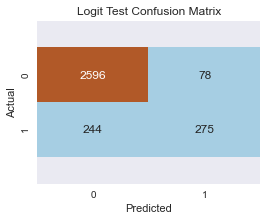

In [226]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

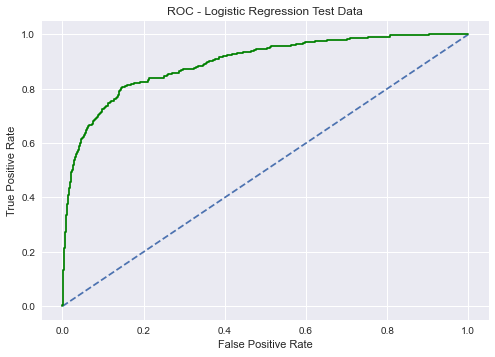

logit_test_auc 0.8951741093495776


In [227]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'g', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc)

## LDA Model

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [229]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [230]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.923243,0.076757
1,0.967232,0.032768
2,0.955493,0.044507
3,0.948234,0.051766
4,0.977730,0.022270
5,0.968730,0.031270
6,0.894993,0.105007
7,0.872065,0.127935
8,0.868973,0.131027
9,0.878862,0.121138


In [231]:
LDA_met,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.88
LDA_test_precision  0.92
LDA_test_recall  0.94
LDA_test_f1  0.93


In [232]:
LDA_met

,precision,recall,f1-score,support
0,0.917818,0.943904,0.930678,2674.000000
1,0.661400,0.564547,0.609148,519.000000
accuracy,0.882242,0.882242,0.882242,0.882242
macro avg,0.789609,0.754226,0.769913,3193.000000
weighted avg,0.876139,0.882242,0.878416,3193.000000


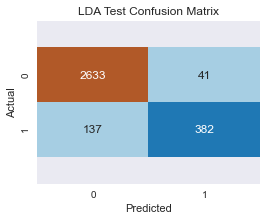

In [313]:
draw_cm(y_test,ytest_predict,"LDA Test Confusion Matrix")

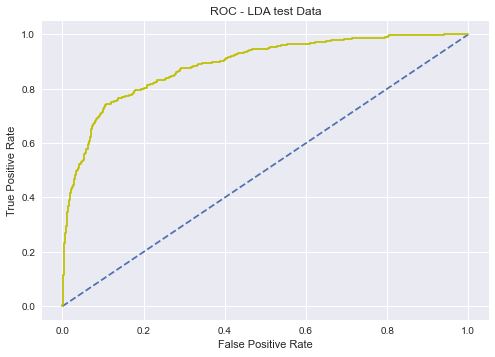

LDA_test_auc 0.8871982107009193


In [233]:
LDA_test_auc, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'y', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc)

## KNN Model

In [234]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [235]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [236]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.92
KNN_test_precision  0.93
KNN_test_recall  0.98
KNN_test_f1  0.95


In [237]:
KNN_met

,precision,recall,f1-score,support
0,0.927157,0.980553,0.953108,2674.000000
1,0.857534,0.603083,0.708145,519.000000
accuracy,0.919198,0.919198,0.919198,0.919198
macro avg,0.892346,0.791818,0.830626,3193.000000
weighted avg,0.915840,0.919198,0.913291,3193.000000


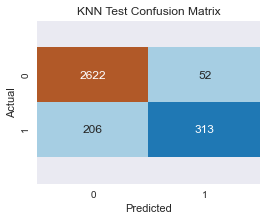

In [238]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

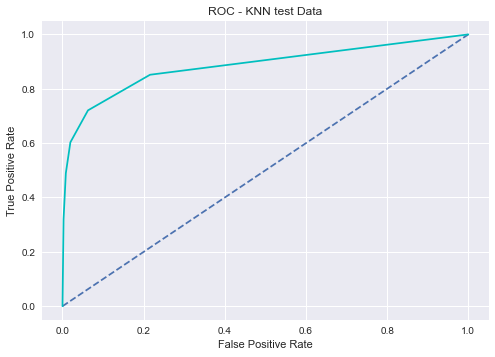

KNN_test_auc 0.8838140921713842


In [239]:
KNN_test_auc, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'c', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc)

## Naive Bayes Model

In [321]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [324]:
model = GaussianNB()
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8412151581584717
[[2484  190]
 [ 317  202]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2674
           1       0.52      0.39      0.44       519

    accuracy                           0.84      3193
   macro avg       0.70      0.66      0.68      3193
weighted avg       0.83      0.84      0.83      3193



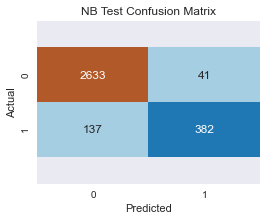

In [319]:
draw_cm(y_test,ytest_predict,"NB Test Confusion Matrix")

## SVM Model

In [248]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [249]:
ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

In [250]:
SVM_met,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.93
SVM_test_precision  0.93
SVM_test_recall  0.99
SVM_test_f1  0.96


In [251]:
SVM_met

,precision,recall,f1-score,support
0,0.927871,0.991025,0.958409,2674.000000
1,0.928783,0.603083,0.731308,519.000000
accuracy,0.927967,0.927967,0.927967,0.927967
macro avg,0.928327,0.797054,0.844859,3193.000000
weighted avg,0.928019,0.927967,0.921495,3193.000000


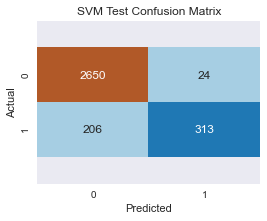

In [252]:
draw_cm(y_test,ytest_predict,"SVM Test Confusion Matrix")

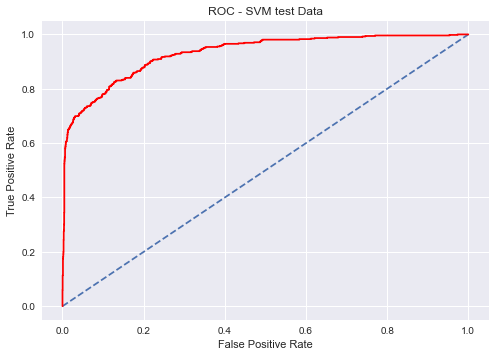

SVM_test_auc 0.9307749065791617


In [253]:
SVM_test_auc, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model, X_test, y_test, 'r', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc)

## Model Tuning

In [334]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [335]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (7448, 25)
After SMOTE:  (12456, 25)


In [336]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.84
logit_test_precision  0.95
logit_test_recall  0.98
logit_test_f1  0.97


In [337]:
logit_met

,precision,recall,f1-score,support
0,0.950542,0.984667,0.967303,2674.000000
1,0.903073,0.736031,0.811040,519.000000
accuracy,0.944253,0.944253,0.944253,0.944253
macro avg,0.926807,0.860349,0.889172,3193.000000
weighted avg,0.942826,0.944253,0.941904,3193.000000


In [330]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.87
KNN_test_precision  0.95
KNN_test_recall  0.98
KNN_test_f1  0.97


In [331]:
KNN_met

,precision,recall,f1-score,support
0,0.950542,0.984667,0.967303,2674.000000
1,0.903073,0.736031,0.811040,519.000000
accuracy,0.944253,0.944253,0.944253,0.944253
macro avg,0.926807,0.860349,0.889172,3193.000000
weighted avg,0.942826,0.944253,0.941904,3193.000000


In [328]:
SVM_met,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.93
SVM_test_precision  0.95
SVM_test_recall  0.98
SVM_test_f1  0.97


In [329]:
SVM_met

,precision,recall,f1-score,support
0,0.950542,0.984667,0.967303,2674.000000
1,0.903073,0.736031,0.811040,519.000000
accuracy,0.944253,0.944253,0.944253,0.944253
macro avg,0.926807,0.860349,0.889172,3193.000000
weighted avg,0.942826,0.944253,0.941904,3193.000000


## Hyperparameter tuning using GridsearchCV- Logistic Regression

In [262]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model = GridSearchCV(clf, param_grid = grid_values,cv = 10, verbose=True)#, scoring = 'f1')
logit_model.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 16.6min finished


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=True)

In [263]:
logit_model.best_params_

{'C': 26.366508987303554, 'penalty': 'l2', 'solver': 'lbfgs'}

In [264]:
ytrain_predict = logit_model.predict(X_train_res)
ytest_predict = logit_model.predict(X_test)

In [265]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.84
logit_test_precision  0.96
logit_test_recall  0.85
logit_test_f1  0.9


In [266]:
logit_met

,precision,recall,f1-score,support
0,0.955678,0.846672,0.897878,2674.00000
1,0.502427,0.797688,0.616530,519.00000
accuracy,0.838710,0.838710,0.838710,0.83871
macro avg,0.729052,0.822180,0.757204,3193.00000
weighted avg,0.882005,0.838710,0.852147,3193.00000


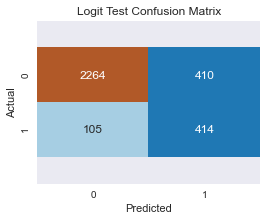

In [267]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

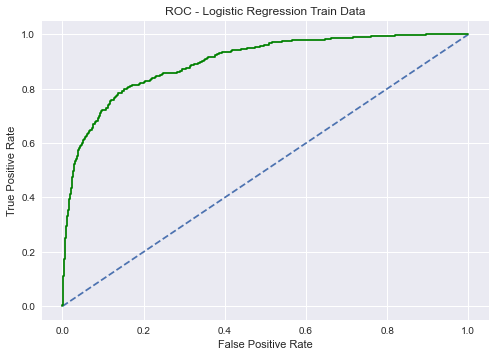

logit_test_auc 0.8980549154564831


In [268]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'g', 'ROC - Logistic Regression Train Data')
print('logit_test_auc', logit_test_auc)

## Linear Discriminant Analysis

In [269]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001]
              }
LDA_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
LDA_model.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.7s finished


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]},
             verbose=True)

In [338]:
LDA_model.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [339]:
ytrain_predict = LDA_model.predict(X_train_res)
ytest_predict = LDA_model.predict(X_test)

In [340]:
LDA_met,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.83
LDA_test_precision  0.96
LDA_test_recall  0.84
LDA_test_f1  0.89


In [341]:
LDA_met

,precision,recall,f1-score,support
0,0.955499,0.835079,0.891239,2674.000000
1,0.484813,0.799615,0.603636,519.000000
accuracy,0.829314,0.829314,0.829314,0.829314
macro avg,0.720156,0.817347,0.747438,3193.000000
weighted avg,0.878992,0.829314,0.844491,3193.000000


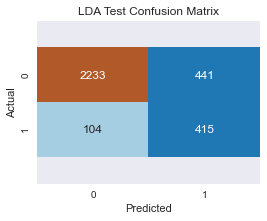

In [274]:
draw_cm(y_test,ytest_predict,"LDA Test Confusion Matrix")

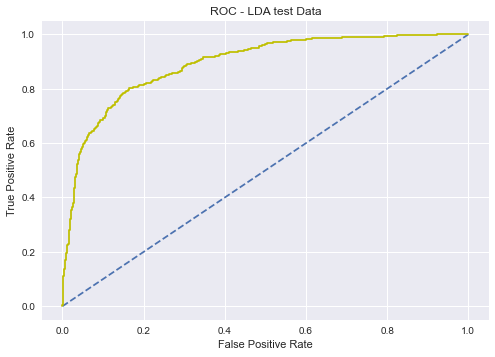

LDA_test_auc 0.8924165193117771


In [275]:
LDA_test_auc, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'y', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc)

## KNN Model

In [276]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,10),
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
KNN_model.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.3min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 10)},
             verbose=True)

In [277]:
KNN_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 6}

In [278]:
ytrain_predict = KNN_model.predict(X_train_res)
ytest_predict = KNN_model.predict(X_test)

In [279]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.87
KNN_test_precision  0.95
KNN_test_recall  0.89
KNN_test_f1  0.92


In [280]:
KNN_met

,precision,recall,f1-score,support
0,0.954637,0.889304,0.920813,2674.000000
1,0.578348,0.782274,0.665029,519.000000
accuracy,0.871907,0.871907,0.871907,0.871907
macro avg,0.766492,0.835789,0.792921,3193.000000
weighted avg,0.893474,0.871907,0.879237,3193.000000


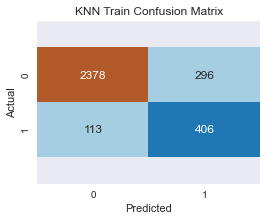

In [281]:
draw_cm(y_test,ytest_predict,"KNN Train Confusion Matrix")

## Bagging using RandomForest

In [282]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#rfcl = RandomForestClassifier(class_weight='balanced')
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=20,random_state=1)
#Bagging_model.fit(X_train_res, y_train_res)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=20,
                  random_state=1)

In [283]:
#ytrain_predict = Bagging_model.predict(X_train_res)
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [284]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.94
Bagging_test_precision  0.94
Bagging_test_recall  0.99
Bagging_test_f1  0.96


In [285]:
Bagging_met

,precision,recall,f1-score,support
0,0.938609,0.989155,0.963219,2674.000000
1,0.922667,0.666667,0.774049,519.000000
accuracy,0.936737,0.936737,0.936737,0.936737
macro avg,0.930638,0.827911,0.868634,3193.000000
weighted avg,0.936018,0.936737,0.932471,3193.000000


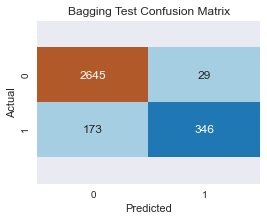

In [286]:
draw_cm(y_test,ytest_predict,"Bagging Test Confusion Matrix")

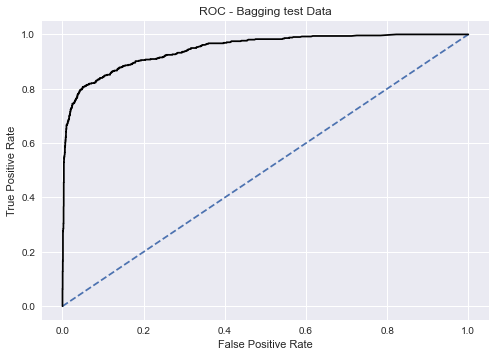

Bagging_test_auc 0.9469371079243065


In [287]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'k', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

## XGBoost

In [288]:
import xgboost as xgb
#grid_values = {'max_depth':[4,5,6],
#               'min_child_weight':[2,3,4]
#              }
#clf=xgb.XGBClassifier(learning_rate =0.01,
#                            n_estimators=1000,
#                            max_depth=5,
#                            min_child_weight=1,
#                            gamma=0,
#                            subsample=0.8,
#                            colsample_bytree=0.8,
#                            objective= 'binary:logistic',
#                            nthread=4,
#                            scale_pos_weight=1,
#                            seed = 27
#                           )

#XGB_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000,
                              #gamma=0,
                              #subsample=0.8,
                              #colsample_bytree=0.8,
                              #objective= 'binary:logistic',
                              #nthread=4,
                              #scale_pos_weight=1,
                              #seed = 27)
                             )
#XGB_model.fit(X_train_res, y_train_res)
XGB_model.fit(X_train, y_train)

[11:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [289]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [290]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.94
XGB_test_precision  0.94
XGB_test_recall  0.99
XGB_test_f1  0.97


In [291]:
XGB_met

,precision,recall,f1-score,support
0,0.943612,0.988781,0.965668,2674.000000
1,0.923274,0.695568,0.793407,519.000000
accuracy,0.941121,0.941121,0.941121,0.941121
macro avg,0.933443,0.842175,0.879537,3193.000000
weighted avg,0.940306,0.941121,0.937668,3193.000000


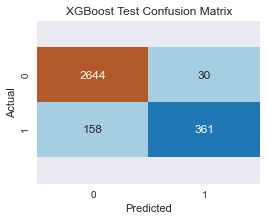

In [292]:
draw_cm(y_test,ytest_predict,"XGBoost Test Confusion Matrix")

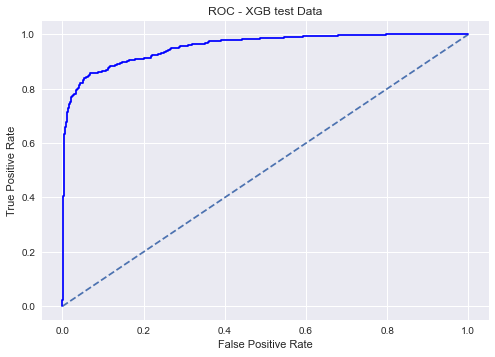

XGB_test_auc 0.9551327779242922


In [293]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'b', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

## Gradient Boosting Classifier

In [358]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [359]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [361]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.95
GBC_test_precision  0.95
GBC_test_recall  0.99
GBC_test_f1  0.97


In [362]:
GBC_met

,precision,recall,f1-score,support
0,0.951334,0.986911,0.968796,2674.000000
1,0.916468,0.739884,0.818763,519.000000
accuracy,0.946759,0.946759,0.946759,0.946759
macro avg,0.933901,0.863398,0.893780,3193.000000
weighted avg,0.945667,0.946759,0.944409,3193.000000


In [297]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
perf_data = pd.DataFrame({'Logit Train':[logit_train_accu,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
                     'Logit Test':[logit_test_accu,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
                     
                     'LDA Test':[LDA_test_accu,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
                     
                     'KNN Test':[KNN_test_accu,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                                                             
                     'SVM Test':[SVM_test_accu,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1],
                    
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                     
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_precision,XGB_test_f1]
                    },index=index)
round(perf_data,2)

,Logit Train,Logit Test,LDA Test,KNN Test,SVM Test,Bagging Test,XGB Test
Accuracy,0.89,0.84,0.83,0.87,0.93,0.94,0.94
AUC,0.90,0.90,0.89,0.88,0.93,0.95,0.96
Recall,0.96,0.85,0.84,0.89,0.99,0.99,0.99
Precision,0.91,0.96,0.96,0.95,0.93,0.94,0.94
F1 Score,0.94,0.90,0.89,0.92,0.96,0.96,0.97


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

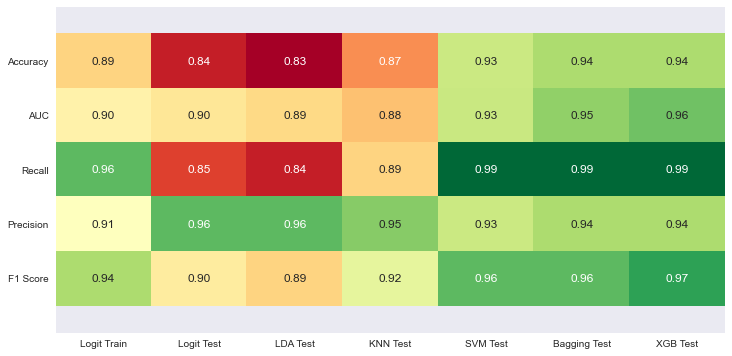

In [298]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":12}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 

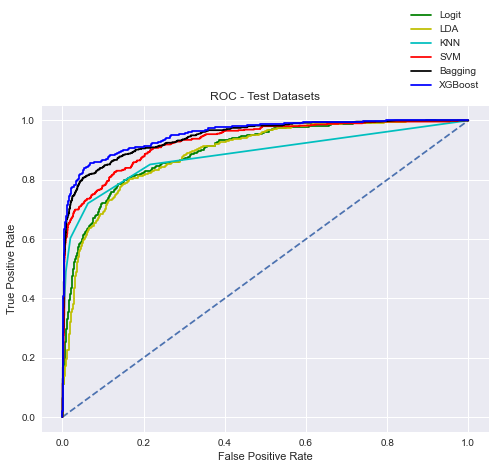

In [299]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='g',label="Logit")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='y',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='c',label="KNN")
plt.plot(SVM_test_fpr,SVM_test_tpr,color='r',label="SVM")
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='k',label="Bagging")
plt.plot(XGB_test_fpr,XGB_test_tpr,color='b',label="XGBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Datasets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Building Neural Network Model

In [347]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [349]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.77668199
Iteration 2, loss = 0.55230474
Iteration 3, loss = 0.46162771
Iteration 4, loss = 0.41592421
Iteration 5, loss = 0.38841310
Iteration 6, loss = 0.37009502
Iteration 7, loss = 0.35707324
Iteration 8, loss = 0.34720362
Iteration 9, loss = 0.33932960
Iteration 10, loss = 0.33300175
Iteration 11, loss = 0.32763755
Iteration 12, loss = 0.32287162
Iteration 13, loss = 0.31874291
Iteration 14, loss = 0.31501192
Iteration 15, loss = 0.31153426
Iteration 16, loss = 0.30829281
Iteration 17, loss = 0.30535137
Iteration 18, loss = 0.30256548
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [350]:
y_pred = clf.predict(X_test)

In [351]:
confusion_matrix(y_test, y_pred)

array([[2641,   33],
       [ 370,  149]], dtype=int64)

In [352]:
clf.score(X_test,y_test)

0.8737864077669902

In [354]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2674
           1       0.82      0.29      0.43       519

    accuracy                           0.87      3193
   macro avg       0.85      0.64      0.68      3193
weighted avg       0.87      0.87      0.85      3193



In [355]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=1000, max_iter=50000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [356]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.60583589
Iteration 2, loss = 0.48086602
Iteration 3, loss = 0.42504890
Iteration 4, loss = 0.39383827
Iteration 5, loss = 0.37364583
Iteration 6, loss = 0.35963787
Iteration 7, loss = 0.34927536
Iteration 8, loss = 0.34118479
Iteration 9, loss = 0.33453254
Iteration 10, loss = 0.32889556
Iteration 11, loss = 0.32401295
Iteration 12, loss = 0.31959569
Iteration 13, loss = 0.31560711
Iteration 14, loss = 0.31189763
Iteration 15, loss = 0.30853094
Iteration 16, loss = 0.30532848
Iteration 17, loss = 0.30240088
Iteration 18, loss = 0.29956807
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=1000, max_iter=50000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [357]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
clf.score(X_test,y_test)
print(classification_report(y_test, y_pred))

[[2634   40]
 [ 361  158]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2674
           1       0.80      0.30      0.44       519

    accuracy                           0.87      3193
   macro avg       0.84      0.64      0.68      3193
weighted avg       0.87      0.87      0.85      3193



## AdaBoostClassifier

In [363]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)
y_pred=clfADB.predict(X_test)
model_scoreADB = clfADB.score(X_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

0.9285937989351707
[[2623   51]
 [ 177  342]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2674
           1       0.87      0.66      0.75       519

    accuracy                           0.93      3193
   macro avg       0.90      0.82      0.85      3193
weighted avg       0.93      0.93      0.92      3193



## Lazy Predict

In [365]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:27<00:02,  1.41it/s]

[12:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:28<00:00,  1.04it/s]


In [367]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.87     0.87      0.95   
XGBClassifier                      0.95               0.87     0.87      0.95   
BaggingClassifier                  0.94               0.84     0.84      0.94   
RandomForestClassifier             0.94               0.84     0.84      0.93   
ExtraTreesClassifier               0.94               0.84     0.84      0.94   
DecisionTreeClassifier             0.91               0.82     0.82      0.91   
AdaBoostClassifier                 0.92               0.81     0.81      0.92   
SVC                                0.93               0.80     0.80      0.92   
KNeighborsClassifier               0.92               0.79     0.79      0.91   
LabelPropagation                   0.90               0.78     0.78      0.90   
LabelSpreading              

## LightGBM Classifier

In [379]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [380]:
y_pred=clf.predict(X_test)

In [381]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9471


In [383]:
from sklearn.metrics import classification_report
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2642   32]
 [ 137  382]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2674
           1       0.92      0.74      0.82       519

    accuracy                           0.95      3193
   macro avg       0.94      0.86      0.89      3193
weighted avg       0.95      0.95      0.94      3193



In [405]:
import lightgbm as lgb
#clf = lgb.LGBMClassifier()
#clf.fit(X_train, y_train)
#Set the minimum error arbitrarily large
min = 99999999999999999999999 
count = 0 #Used for keeping track of the iteration number
#How many runs to perform using randomly selected hyperparameters
iterations = 50
for i in range(iterations):
    print('iteration number', count)
    count += 1 #increment count
    try:
        d_train = lgb.Dataset(X_train, label=y_train) #Load in data
        params = {} #initialize parameters
        params['learning_rate'] = np.random.uniform(0, 1)
        params['boosting_type'] = np.random.choice(['gbdt', 'dart', 'goss'])
        params['objective'] = 'regression'
        params['metric'] = 'mae'
        params['sub_feature'] = np.random.uniform(0, 1)
        params['num_leaves'] = np.random.randint(20, 300)
        params['min_data'] = np.random.randint(10, 100)
        params['max_depth'] = np.random.randint(5, 200)
        iterations = np.random.randint(10, 10000)
        print(params, iterations)
#Train using selected parameters
    clf = lgb.train(params, d_train, iterations)
    y_pred=clf.predict(X_test) #Create predictions on test set
    mae=mean_absolute_error(y_pred,y_test)
        print('MAE:', mae)
        if mae < min:
            min = mae
            pp = params 
        except: #in case something goes wrong
        print('failed with')
        print(params)
print("*" * 50)
print('Minimum is: ', min)
print('Used params', pp)

SyntaxError: invalid syntax (<ipython-input-405-0eaee07d1693>, line 26)

## CatBoost 

In [406]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier() 
catboost.fit(X_train, y_train)

Learning rate set to 0.024283
0:	learn: 0.6589631	total: 157ms	remaining: 2m 36s
1:	learn: 0.6343495	total: 165ms	remaining: 1m 22s
2:	learn: 0.6064699	total: 172ms	remaining: 57.3s
3:	learn: 0.5854709	total: 180ms	remaining: 44.8s
4:	learn: 0.5614221	total: 190ms	remaining: 37.8s
5:	learn: 0.5379073	total: 206ms	remaining: 34.1s
6:	learn: 0.5196356	total: 222ms	remaining: 31.5s
7:	learn: 0.5019960	total: 231ms	remaining: 28.6s
8:	learn: 0.4830243	total: 240ms	remaining: 26.5s
9:	learn: 0.4684935	total: 249ms	remaining: 24.7s
10:	learn: 0.4560955	total: 258ms	remaining: 23.2s
11:	learn: 0.4452989	total: 266ms	remaining: 21.9s
12:	learn: 0.4352883	total: 276ms	remaining: 21s
13:	learn: 0.4241605	total: 285ms	remaining: 20.1s
14:	learn: 0.4108477	total: 297ms	remaining: 19.5s
15:	learn: 0.4004465	total: 305ms	remaining: 18.7s
16:	learn: 0.3902226	total: 314ms	remaining: 18.1s
17:	learn: 0.3813000	total: 322ms	remaining: 17.5s
18:	learn: 0.3712598	total: 330ms	remaining: 17s
19:	learn: 0.

164:	learn: 0.1712488	total: 2.17s	remaining: 11s
165:	learn: 0.1709493	total: 2.18s	remaining: 11s
166:	learn: 0.1707605	total: 2.2s	remaining: 11s
167:	learn: 0.1705388	total: 2.21s	remaining: 10.9s
168:	learn: 0.1699112	total: 2.22s	remaining: 10.9s
169:	learn: 0.1696872	total: 2.23s	remaining: 10.9s
170:	learn: 0.1692891	total: 2.24s	remaining: 10.9s
171:	learn: 0.1690287	total: 2.25s	remaining: 10.9s
172:	learn: 0.1687564	total: 2.27s	remaining: 10.8s
173:	learn: 0.1685659	total: 2.28s	remaining: 10.8s
174:	learn: 0.1684256	total: 2.29s	remaining: 10.8s
175:	learn: 0.1682874	total: 2.3s	remaining: 10.8s
176:	learn: 0.1680059	total: 2.31s	remaining: 10.7s
177:	learn: 0.1676786	total: 2.32s	remaining: 10.7s
178:	learn: 0.1674848	total: 2.33s	remaining: 10.7s
179:	learn: 0.1673193	total: 2.33s	remaining: 10.6s
180:	learn: 0.1668279	total: 2.35s	remaining: 10.6s
181:	learn: 0.1666359	total: 2.36s	remaining: 10.6s
182:	learn: 0.1663571	total: 2.37s	remaining: 10.6s
183:	learn: 0.166048

331:	learn: 0.1413346	total: 4.13s	remaining: 8.3s
332:	learn: 0.1412251	total: 4.14s	remaining: 8.29s
333:	learn: 0.1409251	total: 4.15s	remaining: 8.28s
334:	learn: 0.1407950	total: 4.16s	remaining: 8.26s
335:	learn: 0.1406682	total: 4.17s	remaining: 8.25s
336:	learn: 0.1404915	total: 4.19s	remaining: 8.24s
337:	learn: 0.1403474	total: 4.2s	remaining: 8.23s
338:	learn: 0.1402568	total: 4.22s	remaining: 8.22s
339:	learn: 0.1401519	total: 4.23s	remaining: 8.21s
340:	learn: 0.1399587	total: 4.24s	remaining: 8.2s
341:	learn: 0.1397850	total: 4.25s	remaining: 8.19s
342:	learn: 0.1396744	total: 4.27s	remaining: 8.17s
343:	learn: 0.1395650	total: 4.28s	remaining: 8.16s
344:	learn: 0.1394404	total: 4.29s	remaining: 8.14s
345:	learn: 0.1393692	total: 4.3s	remaining: 8.12s
346:	learn: 0.1392659	total: 4.31s	remaining: 8.11s
347:	learn: 0.1391277	total: 4.32s	remaining: 8.09s
348:	learn: 0.1390128	total: 4.33s	remaining: 8.08s
349:	learn: 0.1388283	total: 4.34s	remaining: 8.06s
350:	learn: 0.13

494:	learn: 0.1197907	total: 5.9s	remaining: 6.02s
495:	learn: 0.1197612	total: 5.91s	remaining: 6s
496:	learn: 0.1196511	total: 5.92s	remaining: 5.99s
497:	learn: 0.1193982	total: 5.92s	remaining: 5.97s
498:	learn: 0.1193256	total: 5.93s	remaining: 5.96s
499:	learn: 0.1192624	total: 5.95s	remaining: 5.95s
500:	learn: 0.1191685	total: 5.95s	remaining: 5.93s
501:	learn: 0.1190865	total: 5.96s	remaining: 5.92s
502:	learn: 0.1189911	total: 5.97s	remaining: 5.9s
503:	learn: 0.1188222	total: 5.98s	remaining: 5.88s
504:	learn: 0.1186588	total: 5.99s	remaining: 5.87s
505:	learn: 0.1185726	total: 6s	remaining: 5.86s
506:	learn: 0.1184262	total: 6.01s	remaining: 5.84s
507:	learn: 0.1181796	total: 6.02s	remaining: 5.83s
508:	learn: 0.1180596	total: 6.03s	remaining: 5.81s
509:	learn: 0.1179363	total: 6.04s	remaining: 5.8s
510:	learn: 0.1178575	total: 6.05s	remaining: 5.79s
511:	learn: 0.1177238	total: 6.06s	remaining: 5.77s
512:	learn: 0.1176225	total: 6.08s	remaining: 5.77s
513:	learn: 0.1174399

653:	learn: 0.1035534	total: 7.7s	remaining: 4.07s
654:	learn: 0.1035070	total: 7.71s	remaining: 4.06s
655:	learn: 0.1034527	total: 7.72s	remaining: 4.05s
656:	learn: 0.1033722	total: 7.73s	remaining: 4.04s
657:	learn: 0.1032966	total: 7.74s	remaining: 4.02s
658:	learn: 0.1031278	total: 7.75s	remaining: 4.01s
659:	learn: 0.1030858	total: 7.76s	remaining: 4s
660:	learn: 0.1030012	total: 7.78s	remaining: 3.99s
661:	learn: 0.1029397	total: 7.79s	remaining: 3.98s
662:	learn: 0.1028744	total: 7.8s	remaining: 3.96s
663:	learn: 0.1027918	total: 7.81s	remaining: 3.95s
664:	learn: 0.1027118	total: 7.82s	remaining: 3.94s
665:	learn: 0.1026115	total: 7.83s	remaining: 3.93s
666:	learn: 0.1025626	total: 7.84s	remaining: 3.92s
667:	learn: 0.1024942	total: 7.86s	remaining: 3.9s
668:	learn: 0.1023906	total: 7.87s	remaining: 3.89s
669:	learn: 0.1023186	total: 7.88s	remaining: 3.88s
670:	learn: 0.1022397	total: 7.89s	remaining: 3.87s
671:	learn: 0.1021802	total: 7.9s	remaining: 3.85s
672:	learn: 0.10209

829:	learn: 0.0893397	total: 9.46s	remaining: 1.94s
830:	learn: 0.0892827	total: 9.47s	remaining: 1.93s
831:	learn: 0.0891933	total: 9.48s	remaining: 1.92s
832:	learn: 0.0890975	total: 9.49s	remaining: 1.9s
833:	learn: 0.0889906	total: 9.51s	remaining: 1.89s
834:	learn: 0.0889368	total: 9.52s	remaining: 1.88s
835:	learn: 0.0888619	total: 9.53s	remaining: 1.87s
836:	learn: 0.0887488	total: 9.54s	remaining: 1.86s
837:	learn: 0.0886614	total: 9.55s	remaining: 1.84s
838:	learn: 0.0885887	total: 9.55s	remaining: 1.83s
839:	learn: 0.0885028	total: 9.56s	remaining: 1.82s
840:	learn: 0.0884258	total: 9.58s	remaining: 1.81s
841:	learn: 0.0883772	total: 9.59s	remaining: 1.8s
842:	learn: 0.0883121	total: 9.6s	remaining: 1.79s
843:	learn: 0.0882764	total: 9.61s	remaining: 1.78s
844:	learn: 0.0882031	total: 9.62s	remaining: 1.76s
845:	learn: 0.0881540	total: 9.63s	remaining: 1.75s
846:	learn: 0.0880887	total: 9.64s	remaining: 1.74s
847:	learn: 0.0880614	total: 9.65s	remaining: 1.73s
848:	learn: 0.0

In [407]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = catboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2647   27]
 [ 139  380]]


0.948011274663326

In [408]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2674
           1       0.93      0.73      0.82       519

    accuracy                           0.95      3193
   macro avg       0.94      0.86      0.90      3193
weighted avg       0.95      0.95      0.95      3193



# Check Multicollinearity and Run Stats Model


In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [301]:
X = scaled_df.drop('FORECLOSURE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,NET_DISBURSED_AMT,49991.200563
19,OUTSTANDING_PRINCIPAL,43530.976772
21,PAID_PRINCIPAL,2524.668382
6,CURRENT_INTEREST_RATE_MAX,76.934724
4,ORIGNAL_INTEREST_RATE,41.845457
5,CURRENT_INTEREST_RATE,38.892694
14,EXCESS_AVAILABLE,31.316873
13,EXCESS_ADJUSTED_AMT,29.813919
24,DUEDAY_15,17.426343
23,DUEDAY_5,17.351825


In [302]:
X = X.drop('NET_DISBURSED_AMT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,CURRENT_INTEREST_RATE_MAX,76.933766
3,ORIGNAL_INTEREST_RATE,41.842219
4,CURRENT_INTEREST_RATE,38.892048
13,EXCESS_AVAILABLE,30.725754
12,EXCESS_ADJUSTED_AMT,29.304530
23,DUEDAY_15,17.425645
22,DUEDAY_5,17.351723
8,EMI_AMOUNT,7.695003
18,OUTSTANDING_PRINCIPAL,6.467775
20,PAID_PRINCIPAL,5.501192


In [303]:
X = X.drop('CURRENT_INTEREST_RATE_MAX', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,EXCESS_AVAILABLE,30.703620
11,EXCESS_ADJUSTED_AMT,29.290878
3,ORIGNAL_INTEREST_RATE,21.408001
4,CURRENT_INTEREST_RATE,19.204473
22,DUEDAY_15,17.423156
21,DUEDAY_5,17.331817
7,EMI_AMOUNT,7.692300
17,OUTSTANDING_PRINCIPAL,6.452839
19,PAID_PRINCIPAL,5.500967
1,CURRENT_TENOR,4.912594


In [304]:
X = X.drop('DUEDAY_15', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,EXCESS_AVAILABLE,30.697077
11,EXCESS_ADJUSTED_AMT,29.283574
3,ORIGNAL_INTEREST_RATE,21.393705
4,CURRENT_INTEREST_RATE,19.181779
7,EMI_AMOUNT,7.691693
17,OUTSTANDING_PRINCIPAL,6.452666
19,PAID_PRINCIPAL,5.486482
1,CURRENT_TENOR,4.898470
0,ORIGNAL_TENOR,4.383917
10,LAST_RECEIPT_AMOUNT,3.422289


In [305]:
X = X.drop('ORIGNAL_INTEREST_RATE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,EXCESS_AVAILABLE,30.624067
10,EXCESS_ADJUSTED_AMT,29.234105
6,EMI_AMOUNT,7.689784
16,OUTSTANDING_PRINCIPAL,6.446957
18,PAID_PRINCIPAL,5.464727
1,CURRENT_TENOR,4.081877
0,ORIGNAL_TENOR,3.830602
9,LAST_RECEIPT_AMOUNT,3.415934
15,NUM_LOW_FREQ_TRANSACTIONS,3.042996
19,PRODUCT_STHL,2.991105


In [306]:
X = X.drop('EXCESS_AVAILABLE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,EMI_AMOUNT,7.651767
15,OUTSTANDING_PRINCIPAL,6.440604
17,PAID_PRINCIPAL,5.462317
10,EXCESS_ADJUSTED_AMT,4.601801
1,CURRENT_TENOR,4.070698
0,ORIGNAL_TENOR,3.826737
14,NUM_LOW_FREQ_TRANSACTIONS,3.041764
18,PRODUCT_STHL,2.987863
16,PAID_INTEREST,2.801855
4,CURRENT_INTEREST_RATE_CHANGES,2.793569


In [307]:
X = X.drop('EMI_AMOUNT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PAID_PRINCIPAL,4.783209
9,EXCESS_ADJUSTED_AMT,4.471150
1,CURRENT_TENOR,4.066024
0,ORIGNAL_TENOR,3.815735
13,NUM_LOW_FREQ_TRANSACTIONS,3.041122
17,PRODUCT_STHL,2.986815
4,CURRENT_INTEREST_RATE_CHANGES,2.792610
2,COMPLETED_TENURE,2.759175
15,PAID_INTEREST,2.639203
7,MAX_EMI_AMOUNT,2.610029


## Model 1: Logit

In [343]:
import statsmodels.formula.api as SM

In [344]:
f_1 = 'FORECLOSURE ~ MAX_EMI_AMOUNT + ORIGNAL_TENOR + LAST_RECEIPT_AMOUNT + CURRENT_TENOR + PRODUCT_STHL + PRODUCT_STLAP + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + NUM_EMI_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + OUTSTANDING_PRINCIPAL + DPD + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [345]:
model_1 = SM.logit(formula = f_1, data=scaled_df).fit() #fit(method='bfgs')

PatsyError: Error evaluating factor: NameError: name 'PRODUCT_STLAP' is not defined
    FORECLOSURE ~ MAX_EMI_AMOUNT + ORIGNAL_TENOR + LAST_RECEIPT_AMOUNT + CURRENT_TENOR + PRODUCT_STHL + PRODUCT_STLAP + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + NUM_EMI_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + OUTSTANDING_PRINCIPAL + DPD + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5
                                                                                                        ^^^^^^^^^^^^^

In [ ]:
model_1.summary()

In [ ]:
X = X.drop('MAX_EMI_AMOUNT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
X = X.drop('ORIGNAL_TENOR', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [ ]:
f_2 = 'FORECLOSURE ~ LAST_RECEIPT_AMOUNT + CURRENT_TENOR + PRODUCT_STHL + PRODUCT_STLAP + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + NUM_EMI_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + OUTSTANDING_PRINCIPAL + DPD + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [ ]:
model_2 = SM.logit(formula = f_2, data=scaled_df).fit() #fit(method='bfgs')

In [ ]:
model_2.summary()

In [ ]:
f_3 = 'FORECLOSURE ~ CURRENT_TENOR + PRODUCT_STHL + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [ ]:
model_3 = SM.logit(formula = f_3, data=scaled_df).fit()

In [ ]:
model_3.summary()

In [ ]:
f_4 = 'FORECLOSURE ~ PRODUCT_STHL + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + FOIR + NET_LTV + DUEDAY_5'

In [ ]:
model_4 = SM.logit(formula = f_4, data=scaled_df).fit()

In [ ]:
model_4.summary()

In [ ]:
y_prob_pred_train = model_4.predict(fcl_train)

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=scaled_df['FORECLOSURE'],y=y_prob_pred_train)
plt.title('Actual default Vs Predicted Default')
plt.show()

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [0,1]) 
    #cm = metrics.confusion_matrix(actual, predicted)
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12}, cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.yticks(rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
draw_cm(fcl_train['FORECLOSURE'], y_class_pred)

In [ ]:
print(metrics.classification_report(fcl_train['FORECLOSURE'],y_class_pred,digits=3))

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, thresholds = roc_curve(fcl_train['FORECLOSURE'],y_prob_pred_train)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
draw_cm(fcl_train['FORECLOSURE'], y_class_pred)

In [ ]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [ ]:
print(metrics.classification_report(fcl_train['FORECLOSURE'],y_class_pred,digits=3))

### Validating on test data

In [ ]:
y_prob_pred_test = model_4.predict(fcl_test)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
draw_cm(fcl_test['FORECLOSURE'], y_class_pred)

In [ ]:
print(metrics.classification_report(fcl_test['FORECLOSURE'],y_class_pred,digits=3))

In [ ]:
conf_met=metrics.classification_report(fcl_test['FORECLOSURE'],y_class_pred,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).transpose()
logit_test_prec=round(met_df.loc["1"][0],2)
logit_test_rec=round(met_df.loc["1"][1],2)
logit_test_f1=round(met_df.loc["1"][2],2)
logit_test_accu=round(met_df.loc["accuracy"][0],2)

In [342]:
met_df

NameError: name 'met_df' is not defined

In [ ]:
print('logit_test_prec :', logit_test_prec)
print('logit_test_rec :', logit_test_rec)
print('logit_test_f1 :', logit_test_f1)
print('logit_test_accu :', logit_test_accu)

In [ ]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict(X_data)
    #probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

In [ ]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(model_1, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc)

### Sklearn Logit model

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

In [ ]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [ ]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

In [ ]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [ ]:
conf_met=metrics.classification_report(y_train,ytrain_predict,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).transpose()
logit_test_prec=round(met_df.loc["1"][0],2)
logit_test_rec=round(met_df.loc["1"][1],2)
logit_test_f1=round(met_df.loc["1"][2],2)
logit_test_accu=round(met_df.loc["accuracy"][0],2)

In [ ]:
print('logit_test_prec :', logit_test_prec)
print('logit_test_rec :', logit_test_rec)
print('logit_test_f1 :', logit_test_f1)
print('logit_test_accu :', logit_test_accu)

In [ ]:
y_class_pred=[]
for i in range(0,len(ytrain_predict)):
    if np.array(ytrain_predict)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:

print(metrics.classification_report(y_train,y_class_pred,digits=3))